
![](https://hsto.org/files/256/a5d/ed0/256a5ded03274e0f87ccf97164c31c35.png)


# Регрессия - моя профессия



Вспомним: задача, где надо спрогнозировать класс называется классификацией (неожиданное название). Задача, где надо спрогнозировать непрерывную переменную называется регрессией. Пример непрерывной переменной: цена на квартиры. Именно её прогнозированием мы сегодня и займёмся. Поехали!


## 1. Предобработка данных 

Начнём наш крестовый поход за дешёвой недвижимостью с предобработки данных. 

In [10]:
import pandas as pd               # уже знакомый вам пакет для работы с таблицами
import numpy as np                # смутно знакомый вам пакет для работы с матрицами
import matplotlib.pyplot as plt   # уже смутно знакомый вам пакет для картинок :3
import seaborn as sns             # ещё один пакет для картинок 

%matplotlib inline

In [11]:
df = pd.read_csv('flat.csv', sep='\t', index_col='n')  # подгружаем табличку 
print('Размер выборки:', df.shape)                     # смотрим на её размеры 
df.head( ) # Смотрим что лежит в табличке 

Размер выборки: (2040, 10)


,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
n,,,,,,,,,,
1,81,58,40,6.0,12.5,7,1,1,1,3
2,75,44,28,6.0,13.5,7,1,0,1,6
3,128,70,42,6.0,14.5,3,1,1,1,3
4,95,61,37,6.0,13.5,7,1,0,1,1
5,330,104,60,11.0,10.5,7,0,1,1,3


__Описание переменных:__

```
n – номер квартиры по порядку
price – цена квартиры в $1000
totsp – общая площадь квартиры, кв.м.
livesp жилая площадь квартиры, кв.м.
kitsp – площадь кухни, кв.м.
dist – расстояние от центра в км.
metrdist – расстояние до метро в минутах
walk – 1 – пешком от метро, 0 – на транспорте
brick 1 – кирпичный, монолит ж/б, 0 – другой
floor 1 – этаж кроме первого и последнего, 0 – иначе.
code – число от 1 до 8, при помощи которого мы группируем наблюдения по
подвыборкам:
1. Наблюдения сгруппированы на севере, вокруг Калужско-Рижской линии
метрополитена
2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена
3. Северо-запад, вокруг Замоскворецкой линии метрополитена
4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена
5. Юго-восток, вокруг Люблинской линии метрополитена
6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена
7. Восток, вокруг Калиниской линии метрополитена
8. Восток, вокруг Арбатско-Покровской линии метрополитена
```


Какие переменный категориальные? Какие непрерывные?

In [12]:
df.info() # Аосмотрим на информацию по типам переменных 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 1 to 2040
Data columns (total 10 columns):
price       2040 non-null int64
totsp       2040 non-null int64
livesp      2040 non-null int64
kitsp       2040 non-null float64
dist        2040 non-null float64
metrdist    2040 non-null int64
walk        2040 non-null int64
brick       2040 non-null int64
floor       2040 non-null int64
code        2040 non-null int64
dtypes: float64(2), int64(8)
memory usage: 175.3 KB


In [13]:
df.isnull().sum()  # посмотрим на то есть ли в переменных пропуски

price       0
totsp       0
livesp      0
kitsp       0
dist        0
metrdist    0
walk        0
brick       0
floor       0
code        0
dtype: int64

Пропусков нет. Это хорошая новость. А что делать, если бы они были? Вспоминайте, что мы делали в прошлый раз с Титаником! 

Посмотрим как выглядит распределение цен. 

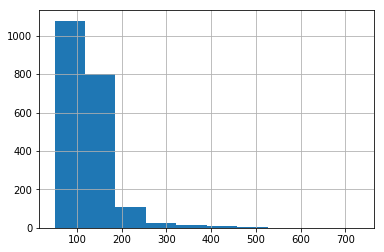

In [14]:
df.price.hist()

У распределения цен есть проблема - очень длинный хвост. В выборке встречаются квартиры с довольно большой стоимостью. Такие наблюдения называются выбросами. С ними нужно бороться, иначе наша модель подстроится под них. Давайте сгладим распределние цен, прологарифмировав его. Так довольно часто поступают с целевой переменной. 

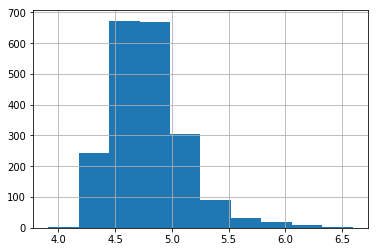

In [15]:
df['price'] = np.log(df['price'])
df.price.hist()

Посмотрим на рспределение всех остальных признаков. Давайте обсудим, что интересного видно на картинках!

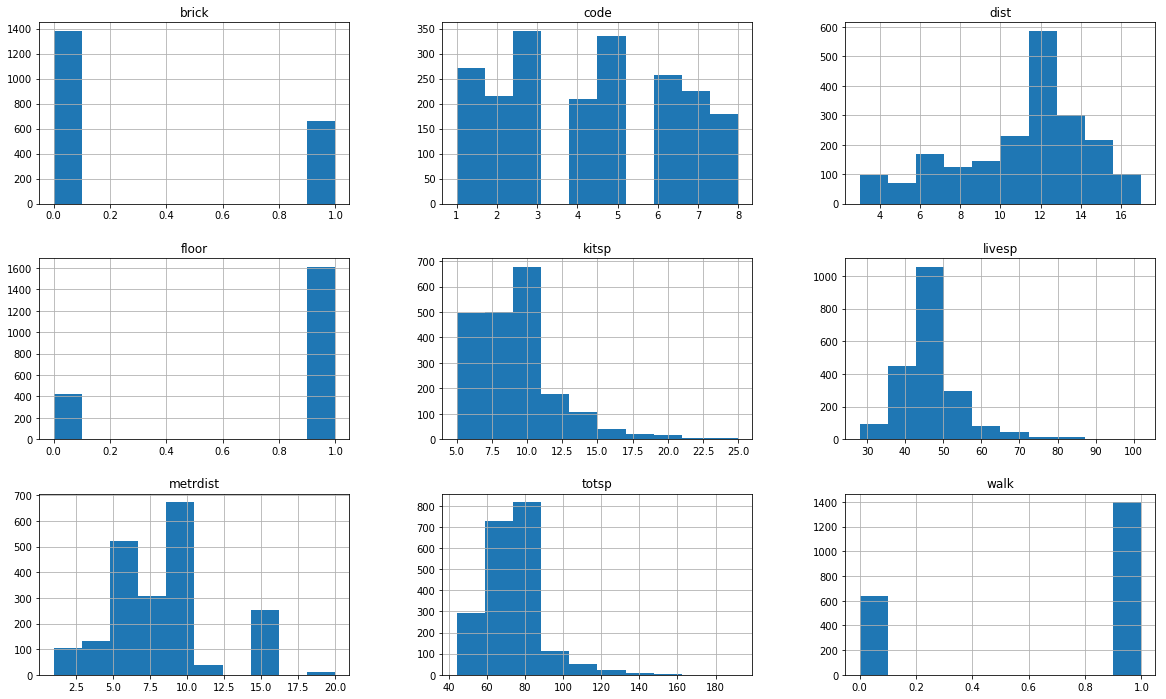

In [17]:
df.drop('price',axis=1).hist(figsize=(20, 12));

Кроме гистограммок имеет смысл взглянуть на матрицу корреляций. Что видно на ней? 

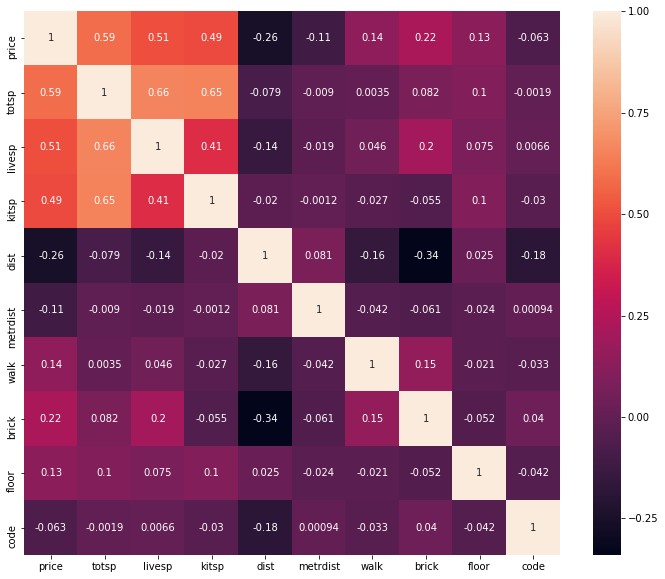

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr('kendall'), annot=True);

Ещё давайте посмотрим на облака рассеивания и успокоимся с картинками. 

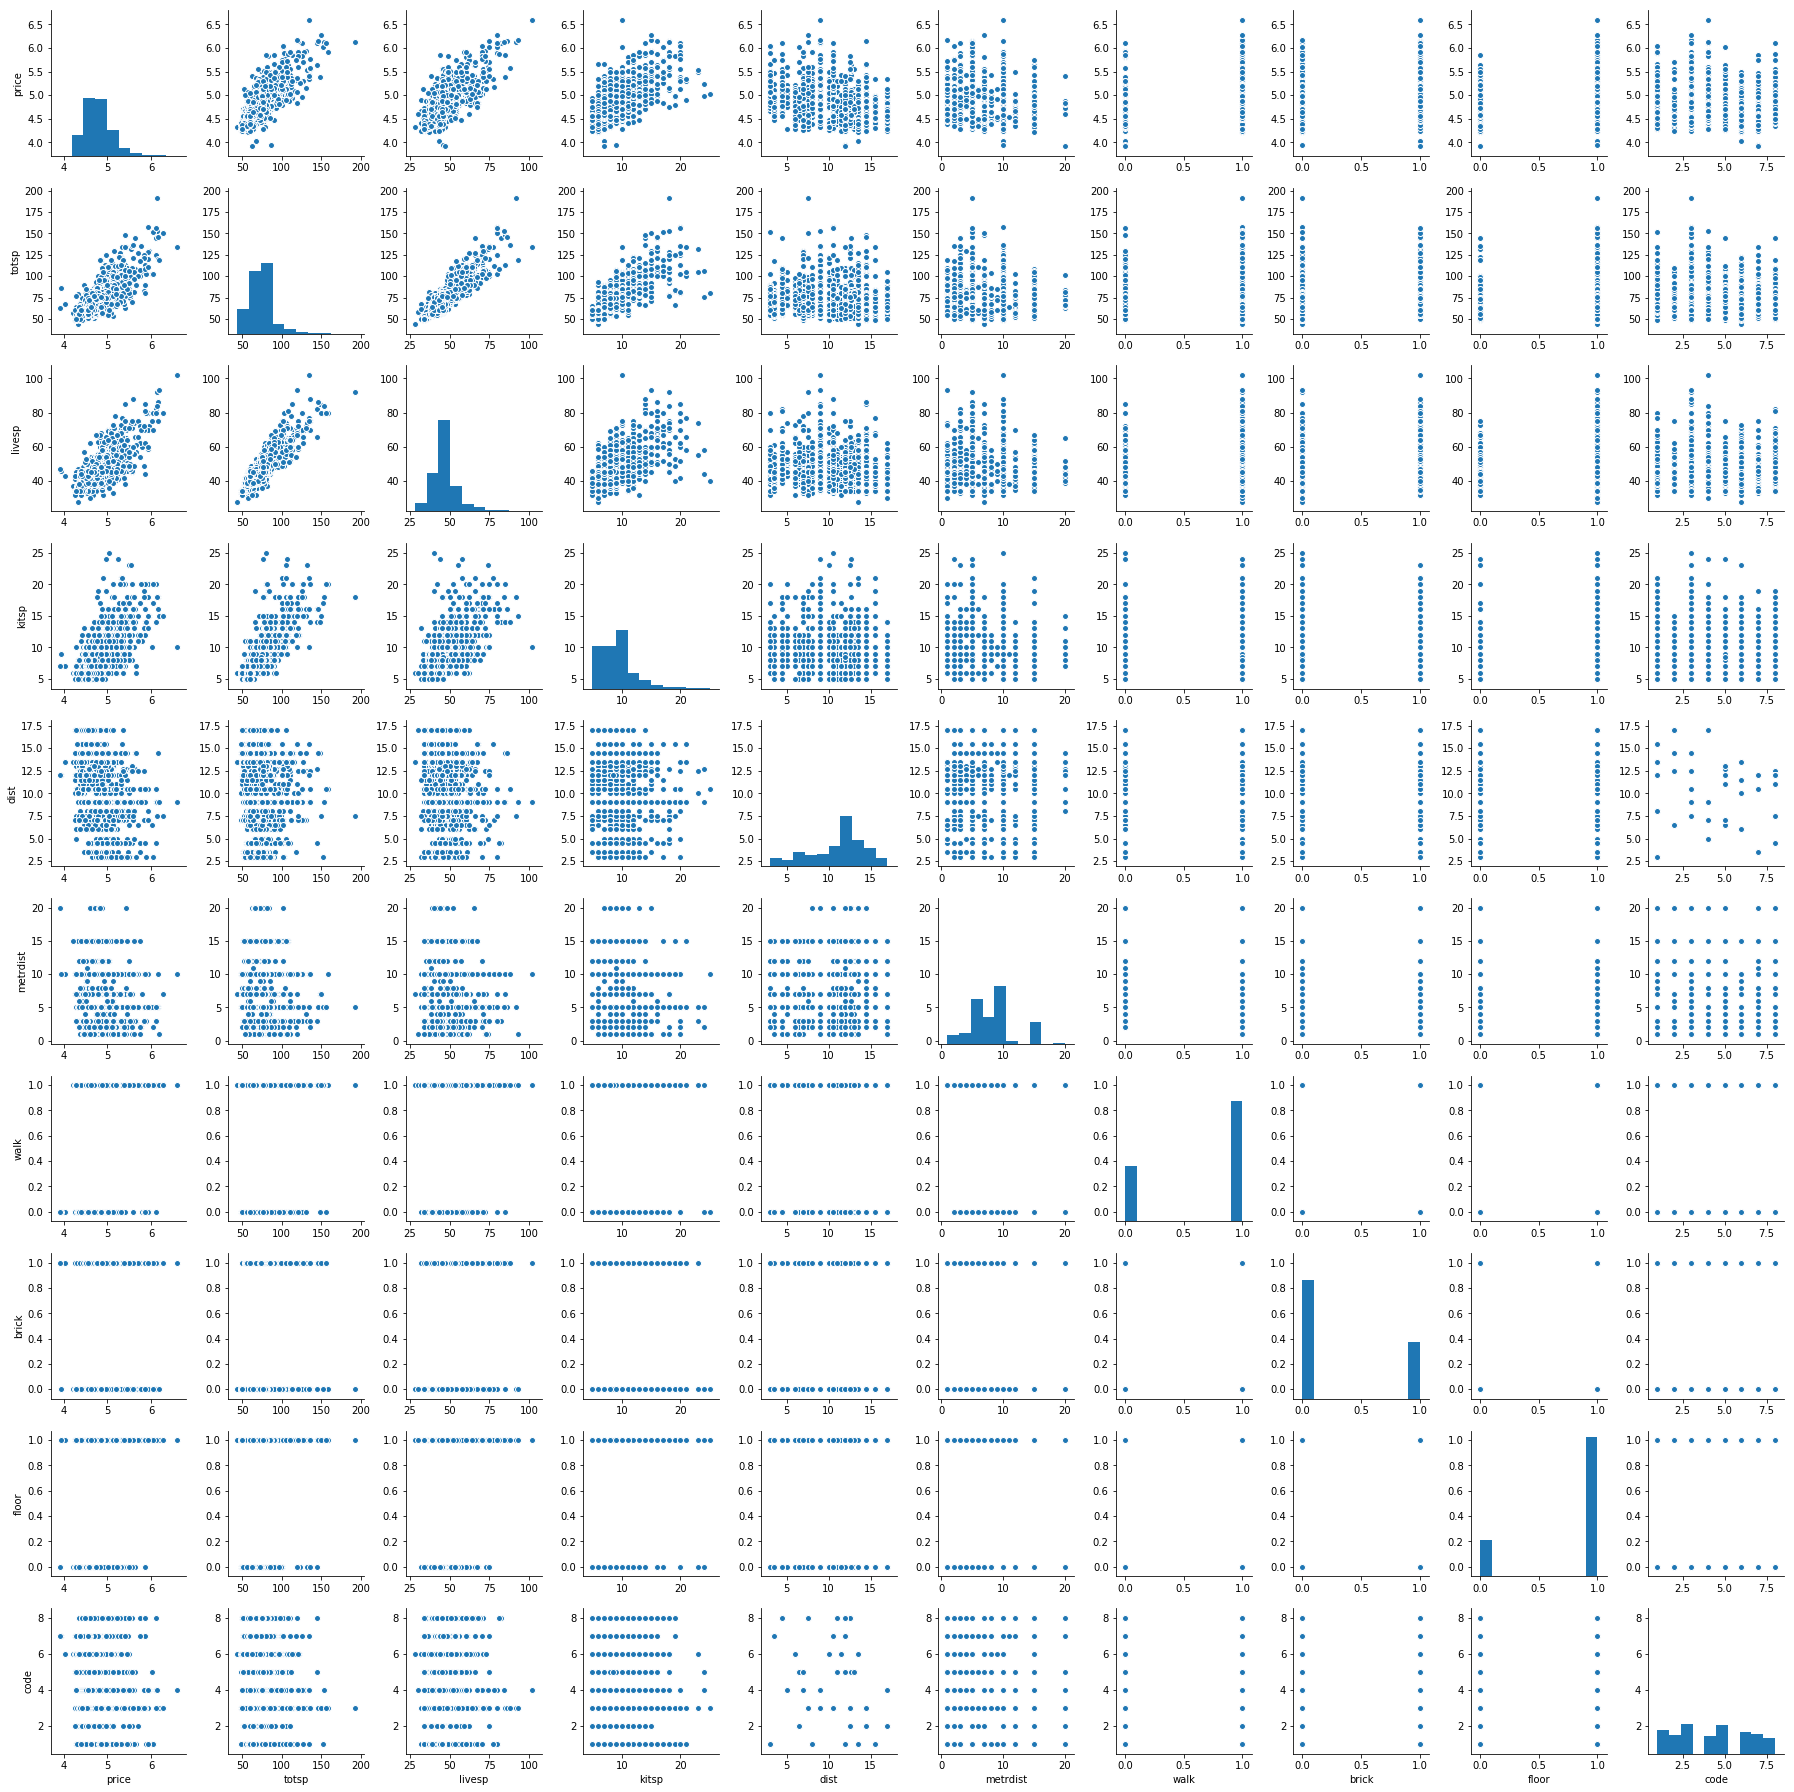

In [18]:
sns.pairplot(df)

Теперь распределение выглядит более приятно. Займёмся предобработкой категориальных переменных. Как вы помните из предыдущего блокнота про титаник, это делается одним горячим кодированием (One Hot Encoding).

In [20]:
# Сделали OHE для категориальной переменной
df_categor = pd.get_dummies(df['code'], drop_first=True, prefix='code')

# Объединили назад наши таблички
df = pd.concat([df.drop('code',axis=1),df_categor], axis=1)
df.head()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code_2,code_3,code_4,code_5,code_6,code_7,code_8
n,,,,,,,,,,,,,,,,
1,4.394449,58,40,6.0,12.5,7,1,1,1,0,1,0,0,0,0,0
2,4.317488,44,28,6.0,13.5,7,1,0,1,0,0,0,0,1,0,0
3,4.852030,70,42,6.0,14.5,3,1,1,1,0,1,0,0,0,0,0
4,4.553877,61,37,6.0,13.5,7,1,0,1,0,0,0,0,0,0,0
5,5.799093,104,60,11.0,10.5,7,0,1,1,0,1,0,0,0,0,0


Делим данные на тренировочные и тестовые! $30\%$ данных откладываем для тестирования качества модели. Остальные $70\%$ берём для обучения. 

In [23]:
from sklearn.cross_validation import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Последний предобрабатывательский штрих это скалирование (стандартизация непрерывных переменных). Давайте вспомним зачем его делают. Обычно, когда обучают модель, хотят минимизировать ошибку, которую она допускает. Чаще всего эту функцию минимизируют численно. Если переменные измерены в разных шкалах (что-то в тоннах, что-то в годах и тд), алгоритм может при обучении заблудиться. Хорошо бы направить его и подтолкнуть в нужном направлении. Таким толчком является стандартизация переменных. 

Из каждой переменной вычетают среднее и делят на стандартное отклонение. Это очищает переменные от своих уникальных шкал и упрощает путь алгоритма к оптимальной точке. Обычно стандартное отклонение и среднее для скалирования оценивают на обучающей выборке. К тестовой применяют уже оценённый результат. Это позволяет не подглядывать в тестовую часть и не улучшать за счёт этого подглядывания прогнозы. Подглядывать - нечестно! 

In [24]:
from sklearn.preprocessing import StandardScaler

# объявили скалировщик!
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(df_train[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']]) 

# Примечание: когда будете делать последнюю домашку, выждите когда мама или бабушка
# спросит а что это ты делаешь? Выдайте ей, что вы учите на трэйне скалировщик скалировать, 
# чтобы стохастический градиентый спуск быстрее обучил вашу регрессию.
# Запомните их реакцию. 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
# Применяем скалировщик к трэйну
df_train_scale = scaler.transform(df_train[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']])

# Применяем скалирвощик к тесту 
df_test_scale = scaler.transform(df_test[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']])

In [26]:
# Заменяем значения на роскалированные 
df_train[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']] = df_train_scale
df_test[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']] = df_test_scale

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

Все непрерывные переменные теперь выглядят проскалированными :) 

In [27]:
df_train.head()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code_2,code_3,code_4,code_5,code_6,code_7,code_8
n,,,,,,,,,,,,,,,,
444,5.075174,2.637793,2.634867,2.142400,1.034659,0.485729,0,0,1,0,1,0,0,0,0,0
1920,4.499810,-0.714744,-0.026626,-0.322827,1.034659,1.801397,0,0,1,0,1,0,0,0,0,0
1264,4.343805,-1.423934,-1.547478,-1.027178,-1.217159,-0.303673,1,0,1,0,0,0,1,0,0,0
1012,5.010635,0.187862,0.480325,-0.322827,-0.616675,-0.303673,1,1,1,0,0,1,0,0,0,0
787,4.672829,-0.585800,-0.280101,0.029348,1.334902,-0.829940,1,0,1,0,0,0,0,0,0,0


In [29]:
print(df_train.shape) # Посмотрим на размеры трэйна и теста 
print(df_test.shape)  

(1428, 16)
(612, 16)


In [30]:
# Вытаскиваем цены и параметры квартир по разным переменным для удобства 

y_train = df_train.price 
y_test = df_test.price 

X_train = df_train.drop('price', axis=1).get_values()
X_test = df_test.drop('price', axis=1).get_values()

## 2. Константный прогноз 

Шаг первый. Построим константный прогноз. Будем говорить, что стоимость любой квартиры равна среднему значению. Это самый глупый прогноз, который мы можем сделать. Мы будм сравнивать с ним прогнозы более сложных моделей. 

In [31]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
y_pred_naive[:5]

array([4.79021025, 4.79021025, 4.79021025, 4.79021025, 4.79021025])

## 3. Метрики качества для регрессии 

Мы сделали выше прогноз. Теперь мы хотим понять насколько он хороший. Для этого обычно используют метрики. Посмотрим на несколько таких метрик. 

In [33]:
from sklearn import metrics  # подгружаем метрики

Первой метрикой, с которой мы познакомимся, будет MAE (mean absolute error), средняя абсолютная ошибка. Она вычисляется следующим образом: 

$$ MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|. $$

Если мы спрогнозировали, что квартира стоит 20 рублей, а она стоила 10 рублей, мы ошиблись на |10 - 20| = 10 рублей. Средняя абсолютная ошибка - это средняя сумма рублей, на которую мы облажались. 

In [34]:
metrics.mean_absolute_error(y_test, y_pred_naive)

0.23618794120598663

Напомню, что мы прогнозируем логарифм цены, нам так удобнее. Ошибка выше считается в логарифмах. Если мы хотим посмотреть на ошибку в долларах, надо взять экспоненту от цен. Ниже мы можем увидеть, что в срденем ошибаемся на 31 тысячу долларов. 

In [35]:
metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))

31.17838752416919

Второй метрикой является MSE (mean squared error), средняя квадратичная ошибка. Она вычисляется как 

$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2.$$

Смысл этой ошибки в том, чтобы штрафовать за большие ошибки сильнее, чем за маленькие. Если мы ошиблись на 5 долларов, то в ошибку войдёт 25. Если мы ошиблись на 10 долларов, то в ошибку войдёт 100. Чем выше ошибка, тем сильнее штраф. 

In [36]:
metrics.mean_squared_error(y_test, y_pred_naive)

0.093757404870402

По аналогии перейдём к долларам. 

In [37]:
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))

2396.615326764345

Получилось многовато, не находите? Всё дело в том, что это не просто доллары, это квадратные доллары. Мы же суммировали квдараты. Неплохо было бы вернутся к обычным долларам. Для этого надо взять из MSE квадратный корень. Тогда получится новая ошибка, RMSE. 

In [39]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive)))

48.95523799109085

Ошибка в среднем на 49 тысяч долларов. Так как более большие ошибки входят с более большим весом, вполне логично, что RMSE получилось больше, чем MAE. 

Часто для нас принципиальным является не то, на сколько денег мы ошиблись, а то на сколько процентов мы ошиблись. Метрика, которая отлавливает процентную ошибку, называется MAPE (mean absolute percentage error), средняя абсолютная процентная ошибка. 

$$
MAPE = \frac{1}{n} \sum_{i=1}^n \frac{|y_i - \hat{y}_i|}{y_i}
$$

Она часто применяется в следующих задачах: например, вы прогнозируете спрос, и вам принципиально, на сколько процентов вы ошиблись, а не абсолютное значение. Если вы предсказали  один, а в реальности было  десять - это не то же самое, что вы предсказали  тысяча, а в реальности было  тысяча  девять. С точки зрения МАЕ или MSE, это две совершенно одинаковые ошибки. А если вас интересует, сколько в среднем на сколько процентов вы ошибаетесь, то это отражает МАРЕ.

Её нам придётся реальзовать самостоятельно. Благо, это не очень трудно. 

In [40]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred_naive)

4.871431657389019

Средняя ошибка примерно на $5\%$ от цены. 

Последняя метрика, с которой нам нужно познакомиться, это коэффициент детерминации, $R^2$. Он отражает то, какую долю дисперсии объясняемой переменной мы объяснили с помощью нашей модели:

$$ R^2 =1- \frac{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \bar{y}_i)^2} $$

Эту метрику очень сильно любят консалтеры и аудиторы, потому что только её они и знают. На самом деле в ней нет ничего хорошего. При добавлении в модель новых переменных она всегда растёт. У неё есть ещё несколько тонких математических недостатков, о которых вы можете узнать из книг. 

In [41]:
metrics.r2_score(y_test, y_pred_naive)

-0.0001607517536963421

Закинем все метрики в одну общую функцию, чтобы было удобно их печатать. 

In [45]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

## 3. Строим нашу первую регрессию!

Пришло время построить линейную регрессию! Эта модель говорит, что цена на квартиру формируется в результате суммирования тех характеристик, которыми она обладает с какими-то весами

$$\hat{y} = \beta_0 + \beta_1 x_1 + ... \beta_n x_n.$$

Например, если мы оценили модель и у нас получилось, что 

$$ price = 10000 + 20 \cdot totsp,$$

то это означает, что средняя стоимость квартиры равна 10 тыс. долларам. При этом каждый дополнительный метр общей площади квартиры делает её дороже на 20 рублей. 

Для того, чтобы обучить регрессию минимизируют одну из метрик, перечисленных в прошлом разделе. В базовой комплектации регресси это делают с MSE. Такая модель обладает огромным количеством няшных статистических свойств. 

In [44]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Посмотрим на качество прогнозов. Мы стали ошибаться меньше, чем раньше. 

In [46]:
print_metrics(y_test,y_pred_regr)

MAE: 14.418306784974186
RMSE: 22.167905298807693
R2: 0.793297754195736
MAPE: 2.1846451544679644


Посмотрим на то, какие признаки вносят в цену наибольший вклад. 

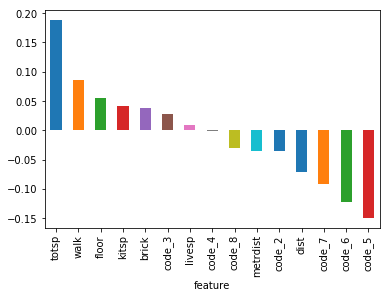

In [47]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

## 4. Строим Lasso-регрессию 

Построим более сложную модель, LASSO-регрейссию. Фишка этой модели в том, что она зануляет лишние коэффиценты. 

In [48]:
from sklearn.linear_model import Lasso

# Объявили модель
model_simplelasso = Lasso()

# Обучили модель на тренировочной выборке 
model_simplelasso.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_lasso = model_simplelasso.predict(X_test)

Посмотрим на важность факторов для стоимости квартиры. 

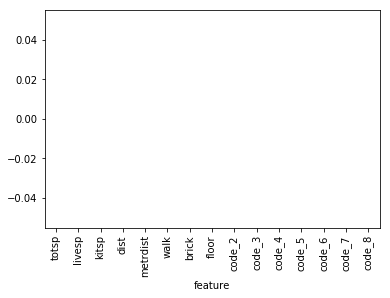

In [49]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": model_simplelasso.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

In [50]:
print_metrics(y_test,y_pred_lasso)

MAE: 31.17838752416919
RMSE: 48.95523799109085
R2: -0.0001607517536963421
MAPE: 4.871431657389019


Важных факторов нет, всё занулилось. Метрики качества такие же, как при константном прогнозе. Почему такое произошло? Дело в том, что у модели есть гиперпараметр - сила зануления. И его нужно подбирать методом перебора. В нашей модели он стоял слишком большим. Давайте попробуем подобрать этот параметр. 

## 5. Подбор гиперпараметра для Lasso-регрессии

Будем делать перебор следующим способом: дробим тренировочную выборку на пять частей. На четырёх учим модель, на пятой прогнозируем. Смотрим на качество. И так по очереди выделяем для прогноза каждую из 5 частичек. Потом качество прогноза усредняем. Из титаника вы можете помнить, что такая стратегия называется скользящим контролем или кросс-валидацией. Для какого параметра из решётки качетство получится наибольшим, тот мы и оставим. 

In [51]:
from sklearn.grid_search import GridSearchCV

# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


/usr/local/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


При параметре 0.001 качество у прогнозов получилось самым хорошим. Его и берём. Посмотрим на важность переменных

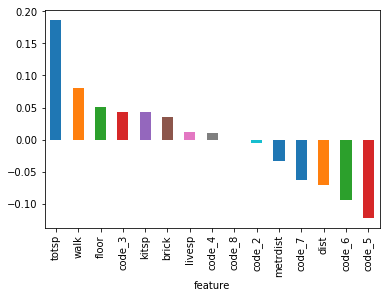

In [52]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

И на качество модели. Оно оказывается близким к обычной регрессии. Судя по всему у нас в выборке нет лишних переменных и занулять нечего. 

In [53]:
print_metrics(y_test,y_pred_lasso)

MAE: 14.565098155139284
RMSE: 22.247981456943045
R2: 0.7918161213895092
MAPE: 2.206996317660492


## 6. Случайный лес

Попробуем более сложную модель, случайный лес. Мы обсуждали его в прошлый раз. В ходе его обучения будут строится деревья. Каждое из них будет выдавать прогноз, потом мы будем по всему лесу прогнозы усреднять. 

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Объявили лес из 100 деревьев
rf = RandomForestRegressor(n_estimators=100)

# Обучили лес 
rf.fit(X_train, y_train)

# Сделали по лесу прогнозы 
y_pred_forest = rf.predict(X_test)

Посмотрим на важность факторов. 

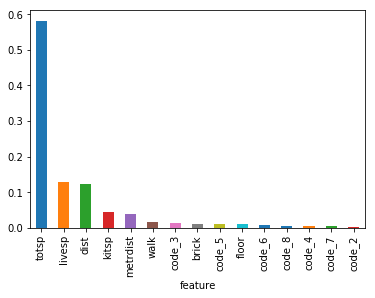

In [55]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": rf.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

## 7. Сравниваем модели между собой 

In [56]:
print_metrics(y_test,y_pred_naive)

MAE: 31.17838752416919
RMSE: 48.95523799109085
R2: -0.0001607517536963421
MAPE: 4.871431657389019


In [57]:
print_metrics(y_test,y_pred_regr)

MAE: 14.418306784974186
RMSE: 22.167905298807693
R2: 0.793297754195736
MAPE: 2.1846451544679644


In [58]:
print_metrics(y_test,y_pred_lasso)

MAE: 14.565098155139284
RMSE: 22.247981456943045
R2: 0.7918161213895092
MAPE: 2.206996317660492


In [59]:
print_metrics(y_test,y_pred_forest)

MAE: 13.523452073547126
RMSE: 22.02985343627344
R2: 0.8053127272612857
MAPE: 2.0338784276380872


Самое хорошее качество дал случайный лес. Недалеко от него ушла обычная линейная регрессия. Наверное, уместно было бы при прогнозировании цены на дома использовать именно её. Она обучается намного быстрее и легче леса. К тому же она интерпретируема. На этом на сегодня всё. 